# Decision tree

In [119]:
import pandas as pd  # Firstly import basic packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [120]:
df = pd.read_csv('D3.csv')  # Read the D3 dataset

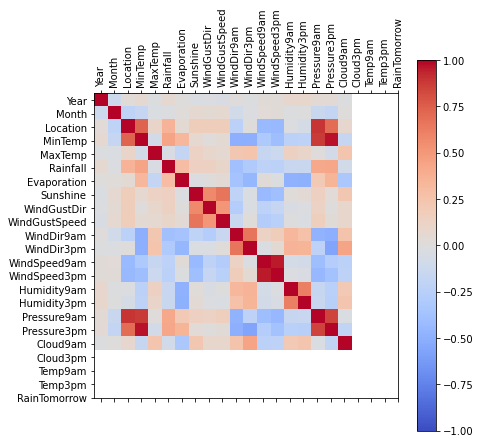

In [121]:
#check any high correlated and negative correlated variables to drop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(222)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [122]:
df.drop(['Location', 'MinTemp', 'Humidity3pm', 'Humidity9am', 
          'Temp3pm', 'Temp9am', 'Cloud9am', 'Cloud3pm', 
          'WindGustSpeed', 'WindSpeed9am', 'Pressure9am', 
          'WindDir9am', 'WindDir3pm', 
          'WindGustDir'], axis=1, inplace=True)
#df = pd.get_dummies(df, columns = [])  # One hot encoding non-ordinal categorical data
    
# target/input split
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)

# setting random state
rs = 42

X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          142219 non-null  int64  
 1   Month         142219 non-null  int64  
 2   MaxTemp       142219 non-null  float64
 3   Rainfall      142219 non-null  float64
 4   Evaporation   142219 non-null  float64
 5   Sunshine      142219 non-null  float64
 6   WindSpeed3pm  142219 non-null  int64  
 7   Pressure3pm   142219 non-null  float64
 8   RainTomorrow  142219 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 9.8 MB


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [125]:
# Train the model with default settings
model = DecisionTreeClassifier(random_state=42) 
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [126]:
print(model.get_params(deep=True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [127]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.9997890570851707
Test accuracy: 0.7469413584587259


In [128]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     33101
           1       0.44      0.47      0.45      9565

    accuracy                           0.75     42666
   macro avg       0.64      0.65      0.64     42666
weighted avg       0.75      0.75      0.75     42666



In [129]:
from sklearn import tree  # How many nodes we have in this tree

treeObj = model.tree_
print(treeObj.node_count)

35683


In [130]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
#indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

MaxTemp : 0.1894403263992696
Pressure3pm : 0.1786760015795584
Rainfall : 0.1705357387559662
Sunshine : 0.1276424310627649
WindSpeed3pm : 0.10431069258171877
Year : 0.08300498569899004
Month : 0.0748905647998548
Evaporation : 0.0714992591218773


In [121]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [300]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [305]:
pip install --user  git+https://github.com/nlhepler/pydot.git

  Cloning https://github.com/nlhepler/pydot.git to /private/var/folders/w9/4jh5bnlj0_7c437pxnkkyn9c0000gn/T/pip-req-build-a3c1nusv
  Running command git clone -q https://github.com/nlhepler/pydot.git /private/var/folders/w9/4jh5bnlj0_7c437pxnkkyn9c0000gn/T/pip-req-build-a3c1nusv
  Created wheel for pydot: filename=pydot-1.0.29-py3-none-any.whl size=20829 sha256=bfbe88d795f9695f613eadcc26efb02783f7c6b2c762e28397f1c5e307ea5205
  Stored in directory: /private/var/folders/w9/4jh5bnlj0_7c437pxnkkyn9c0000gn/T/pip-ephem-wheel-cache-y60f34fk/wheels/28/b2/2d/b6ab7b244be864e492a24c4b7ab8d3567fc34255f46157d877
Successfully built pydot
  Attempting uninstall: pydot
    Found existing installation: pydot 1.4.2
    Uninstalling pydot-1.4.2:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'RECORD'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [127]:
conda install graphviz

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::pyerfa==1.7.3=py38h9ed2024_0
  - defaults/osx-64::pywavelets==1.1.1=py38haf1e3a3_2
  - defaults/osx-64::bokeh==2.3.2=py38hecd8cb5_0
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/osx-64::matplotlib==3.3.4=py38hecd8cb5_0
  - defaults/osx-64::bottleneck==1.3.2=py38hf1fa96c_1
  - defaults/osx-64::scikit-learn==0.24.1=py38hb2f4e1b_0
  - defaults/osx-64::scikit-image==0.18.1=py38hb2f4e1b_0
  - defaults/osx-64::matplotlib-base==3.3.4=py38h8b3ea08_0
  - defaults/osx-64::mkl_fft==1.3.0=py38h4a7008c_2
  - defaults/osx-64::numba==0.53.1=py38hb2f4e1b_0
  - defaults/osx-64::numpy==1.20.1=py38hd6e1bb9_0
  - defaults/osx-64::patsy==0.5.1=py38_0
  - defaults/osx-64::astropy==4.2.1=py38h9ed2024_1
  - defaults/osx-64::tifffile==2020.10.1=py38h0cf3a3e_2
  - defaults/osx-64::anaconda==2021.05=py38_0
  - defaults/noarch:

In [131]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to find optimal hyperparameters for our final decision tree
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=42),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.03144071, 0.0294136 , 0.02871354, 0.02883348, 0.0426789 ,
       0.04178383, 0.04161627, 0.04253964, 0.05922303, 0.06179926,
       0.05895448, 0.06013048, 0.07570441, 0.07565196, 0.07551739,
       0.07520347, 0.09381742, 0.09102511, 0.09147105, 0.09119022,
       0.10786929, 0.1073781 , 0.10792069, 0.10984292, 0.12523341,
       0.12731028, 0.12509365, 0.12340047, 0.1398875 , 0.13983076,
       0.139782  , 0.13996828, 0.15497742, 0.15641081, 0.15730693,
       0.15578594, 0.17093189, 0.17242048, 0.17067587, 0.17131388,
       0.18763149, 0.18899133, 0.18611541, 0.18390937, 0.20219102,
       0.20248523, 0.19919183, 0.19920459, 0.21731057, 0.21369007,
       0.2170058 , 0.21052921, 0.22832263, 0.22581275, 0.21955202,
       0.21861761, 0.25209494, 0.27851741, 0.24554977, 0.23507032,
       0.02698572, 0.02681832, 0.02699826, 0.02689557, 0.04495416,
       0.04245186, 0.04681876, 0.04457469, 0.06073167, 0.05872631,
       0.05876708, 0.05955071, 0.07627435, 0

In [132]:
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}


In [133]:
#retrain with a small max_depth limit

model_small = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=10, random_state=rs)
model_small.fit(X_train, y_train)

print("Train accuracy:", model_small.score(X_train, y_train))
print("Test accuracy:", model_small.score(X_test, y_test))

y_pred = model_small.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8159774190632125
Test accuracy: 0.8113486148221066
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     33101
           1       0.66      0.33      0.44      9565

    accuracy                           0.81     42666
   macro avg       0.74      0.64      0.66     42666
weighted avg       0.79      0.81      0.79     42666



In [98]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model_small.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
#indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

Rainfall : 0.44773271332547065
Sunshine : 0.2890794255979461
Pressure3pm : 0.18621391504213367
MaxTemp : 0.05734217548567818
Month : 0.006728054507639215
WindSpeed3pm : 0.006211490669651024
Evaporation : 0.005570556524439531
Year : 0.0011216688470417292


In [88]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model_small, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dt_viz.png")

True

In [97]:
from sklearn import tree  
# How many nodes we have in this tree
treeObj = model_small.tree_
print(treeObj.node_count)

245


In [89]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


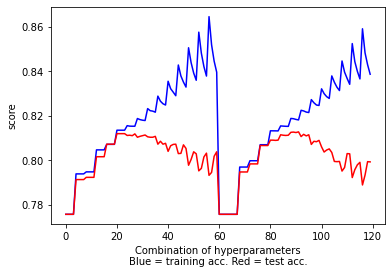

In [90]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

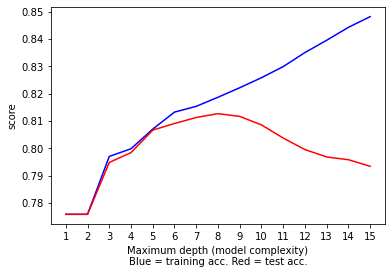

In [91]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

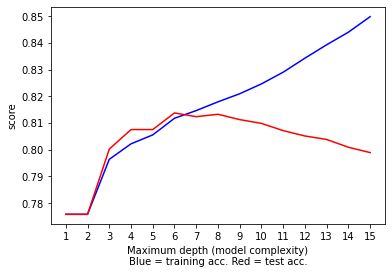

In [92]:
# split1
train_result = result_set['split1_train_score']
test_result = result_set['split1_test_score']
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [93]:
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}


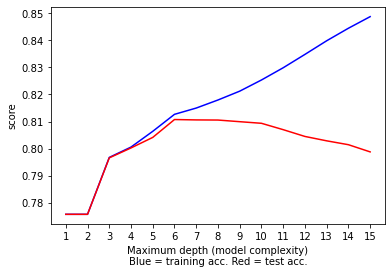

In [94]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [103]:
model_small.fit(X_train, y_train)

print("Train accuracy:", model_small.score(X_train, y_train))
print("Test accuracy:", model_small.score(X_test, y_test))

Train accuracy: 0.8159774190632125
Test accuracy: 0.8113486148221066


In [96]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on RainTomorrow (0 = not rain tomorrow, 1 = rain tomorrow). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 20
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on RainTomorrow (0 = not rain tomorrow, 1 = rain tomorrow). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.9685773480662984 	 0.03142265193370166 	 0
0.6928571428571428 	 0.30714285714285716 	 0
0.7428571428571429 	 0.2571428571428571 	 0
0.9244491080797481 	 0.07555089192025184 	 0
0.9685773480662984 	 0.03142265193370166 	 0
0.8249566724436742 	 0.17504332755632582 	 0
0.8975675072528454 	 0.10243249274715466 	 0
0.935390802587865 	 0.06460919741213499 	 0
0.8975675072528454 	 0.10243249274715466 	 0
0.05277777777777778 	 0.9472222222222222 	 1
0.9517766497461929 	 0.048223350253807105 	 0
0.9893321642554436 	 0.010667835744556481 	 0
0.7991147429349676 	 0.20088525706503235 	 0
0.9893321642554436 	 0.010667835744556481 	 0
0.2484472049689441 	 0.7515527950310559 	 1
0.563953488372093 	 0.436046511627907 	 0
0.5531445384332475 	 0.4468554615667525 	 0


In [67]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.5689240282868826
ROC index on test for DT_optimal: 0.8059378910209598


In [68]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

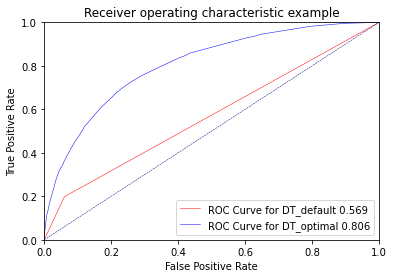

In [69]:
import matplotlib.pyplot as plt  # Visualize the ROC/AUC curve

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
# lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [105]:
#saving the result in the comparision with other predictive mining models (Regression and Neural Network).
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)